In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Breast_cancer.csv")

In [3]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
dataset.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   mean_radius      569 non-null    bool 
 1   mean_texture     569 non-null    bool 
 2   mean_perimeter   569 non-null    bool 
 3   mean_area        569 non-null    bool 
 4   mean_smoothness  569 non-null    bool 
 5   diagnosis        569 non-null    bool 
dtypes: bool(6)
memory usage: 3.5 KB


In [9]:
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [10]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


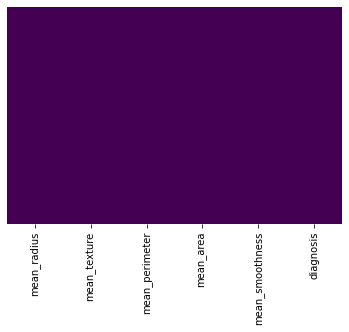

In [12]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

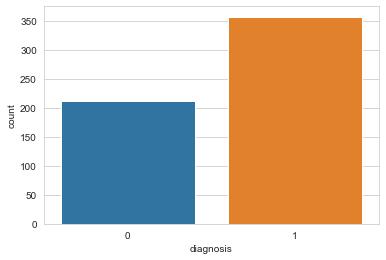

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=dataset)

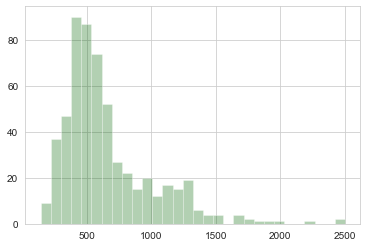

In [14]:
dataset['mean_area'].hist(bins=30,color='darkgreen',alpha=0.3)

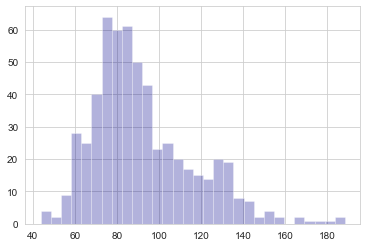

In [16]:
dataset['mean_perimeter'].hist(bins=30,color='darkblue',alpha=0.3)

In [17]:
X = dataset.iloc[:,:-1]

y = dataset.iloc[:,-1]

In [18]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.9210526315789473

In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[43,  4],
       [ 5, 62]], dtype=int64)

In [30]:
prediction_output =pd.DataFrame(data=[y_test.values,predictions],index=['y_test','ypredict'])

In [31]:
prediction_output.transpose()

,y_test,ypredict
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
109,0,0
110,1,1
111,0,0
112,0,0
